--------------------------

# <center> NLP - Pipeline SMS Spam Classification Model </center>

---------------------------------------------

## Importing libraries

In [1]:
# Data analysis and associated manipulation of tabular data in Dataframes
import pandas as pd

# Working with arrays, linear algebra, matrices, arrays
import numpy as np

## Reading data

In [2]:
# Reading the csv file
messages = pd.read_csv('SMSSpamCollection',sep='\t',names = ['Label','Message'])

In [3]:
# Specifying the names of the columns as Label and message
messages.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analysis

In [4]:
# Info about the data
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
# Finding missing values
messages.isnull().sum()

Label      0
Message    0
dtype: int64

There are no missing values in the data

In [6]:
# Shape of the dataset
messages.shape

(5572, 2)

In [7]:
# Target variables counts
messages['Label'].value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

## Data Preprocessing

Calculating the Length and Punctuation of each message for further analysis, and this is added to DataFrame (messages) as Column

In [8]:
# Calculating length of message

mes_len=0
length=[]
for i in range(len(messages)):
  length.append(len(messages['Message'][i]))

In [9]:
length
print(length)

[111, 29, 155, 49, 61, 147, 77, 160, 157, 154, 109, 136, 155, 196, 35, 149, 26, 81, 56, 155, 41, 47, 52, 88, 57, 144, 30, 134, 75, 64, 130, 189, 29, 84, 158, 122, 47, 28, 27, 155, 82, 142, 172, 19, 72, 32, 45, 31, 67, 148, 58, 124, 80, 289, 120, 76, 161, 34, 22, 40, 108, 48, 25, 56, 110, 152, 122, 159, 78, 34, 46, 29, 45, 42, 20, 43, 73, 50, 42, 76, 22, 32, 32, 36, 14, 55, 121, 144, 42, 41, 58, 195, 141, 137, 107, 158, 33, 51, 178, 31, 57, 81, 76, 160, 183, 44, 95, 43, 82, 115, 30, 40, 31, 96, 158, 143, 156, 152, 72, 86, 144, 156, 53, 156, 52, 38, 20, 244, 22, 107, 28, 9, 39, 25, 125, 162, 38, 34, 46, 155, 85, 33, 27, 156, 42, 25, 48, 159, 84, 33, 30, 45, 59, 25, 160, 384, 28, 27, 157, 124, 145, 115, 64, 85, 152, 155, 51, 156, 74, 67, 59, 50, 94, 33, 105, 61, 65, 26, 146, 66, 126, 159, 23, 65, 24, 26, 152, 34, 147, 55, 88, 72, 185, 37, 111, 92, 28, 28, 64, 131, 40, 28, 84, 174, 24, 25, 63, 156, 28, 86, 39, 73, 26, 23, 23, 31, 58, 48, 41, 32, 159, 25, 161, 22, 119, 142, 69, 137, 30, 165

In [10]:
# Adding Length column to the dataframe

messages['Length']=length

In [11]:
messages.head()

,Label,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
# Calculating Punctuations in each message

import string

count=0
punct=[]
for i in range(len(messages)):
  for j in messages['Message'][i]:
    if j in string.punctuation:
      count+=1

  #print(count)
  punct.append(count)
  count=0

In [13]:
punct
print(punct)

[9, 6, 6, 6, 2, 8, 2, 6, 6, 2, 6, 8, 8, 4, 2, 11, 6, 5, 1, 8, 1, 0, 6, 3, 2, 7, 1, 6, 7, 4, 4, 7, 1, 1, 2, 6, 3, 0, 6, 7, 3, 15, 5, 1, 10, 4, 2, 2, 2, 7, 2, 11, 1, 14, 5, 6, 12, 3, 0, 3, 5, 2, 0, 2, 2, 3, 8, 10, 5, 1, 9, 1, 1, 6, 3, 2, 2, 3, 5, 4, 2, 2, 0, 0, 1, 5, 4, 4, 1, 5, 3, 5, 2, 2, 3, 8, 3, 1, 7, 0, 3, 2, 3, 6, 8, 0, 2, 2, 1, 6, 3, 1, 2, 4, 6, 15, 13, 7, 4, 6, 3, 6, 3, 2, 1, 2, 2, 9, 1, 4, 5, 2, 3, 1, 5, 8, 4, 1, 1, 4, 12, 2, 2, 9, 2, 0, 1, 7, 3, 3, 2, 3, 1, 6, 6, 16, 1, 4, 8, 2, 3, 1, 5, 5, 13, 6, 1, 5, 3, 2, 5, 2, 12, 1, 6, 7, 1, 1, 14, 1, 5, 3, 2, 2, 2, 1, 7, 1, 2, 1, 5, 5, 8, 4, 2, 3, 0, 0, 2, 5, 8, 5, 0, 16, 1, 1, 3, 13, 1, 4, 3, 4, 0, 7, 6, 2, 1, 3, 3, 0, 5, 2, 5, 2, 6, 11, 2, 6, 1, 12, 0, 7, 0, 2, 4, 8, 6, 0, 2, 14, 3, 1, 0, 5, 9, 2, 3, 0, 1, 5, 3, 0, 11, 2, 3, 3, 2, 3, 4, 4, 5, 0, 4, 3, 0, 1, 1, 1, 7, 3, 3, 2, 3, 7, 1, 2, 3, 0, 2, 2, 3, 1, 12, 1, 3, 3, 1, 2, 1, 14, 7, 1, 2, 2, 0, 2, 8, 1, 11, 1, 3, 2, 5, 2, 0, 15, 9, 1, 3, 6, 2, 3, 10, 3, 6, 2, 4, 14, 4, 4, 4, 3, 6, 2, 6

In [14]:
# Adding and print punctuation length column to dataframe
messages["Punctuation"]=punct
messages

,Label,Message,Length,Punctuation
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


### Text Cleaning

In [15]:
# Regex
import re

# Stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

# Lemmatization
from nltk.stem import WordNetLemmatizer

# Creating object for Lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
# removal of extra characters and stop words and lemmatization
corpus = []

# Skipping the 0th index (it's of Label)

for i in range(0,len(messages)):
  words = re.sub('[^a-zA-Z]',' ',messages['Message'][i])
  words = words.lower()
  
  # splits into list of words 
  words = words.split()
    
  # Lemmatizing the word and removing the stopwords
  words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    
  # again join words to form sentences
  words = ' '.join(words)
    
  corpus.append(words)

In [17]:
# What is in Corpus?
corpus[0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [18]:
#Replacing Original Message with the Transformed Messages
messages['Message'] = corpus

In [19]:
messages.head()

,Label,Message,Length,Punctuation
0,ham,go jurong point crazy available bugis n great ...,111,9
1,ham,ok lar joking wif u oni,29,6
2,spam,free entry wkly comp win fa cup final tkts st ...,155,6
3,ham,u dun say early hor u c already say,49,6
4,ham,nah think go usf life around though,61,2


### Analyzing the difference between Spam and Ham messages

Split into Spam messages and Ham Messages for further analysis by comparing the Label with the "spam" or "ham".

In [20]:
spam_messages = messages[messages['Label'] == 'spam']
ham_messages = messages[messages['Label'] == 'ham']

In [21]:
spam_messages.head()

,Label,Message,Length,Punctuation
2,spam,free entry wkly comp win fa cup final tkts st ...,155,6
5,spam,freemsg hey darling week word back like fun st...,147,8
8,spam,winner valued network customer selected receiv...,157,6
9,spam,mobile month u r entitled update latest colour...,154,2
11,spam,six chance win cash pound txt csh send cost p ...,136,8


In [22]:
ham_messages.head()

,Label,Message,Length,Punctuation
0,ham,go jurong point crazy available bugis n great ...,111,9
1,ham,ok lar joking wif u oni,29,6
3,ham,u dun say early hor u c already say,49,6
4,ham,nah think go usf life around though,61,2
6,ham,even brother like speak treat like aid patent,77,2


Now **spam_messages** only have the spam labels and **ham_messages** only have the ham labels.

In [23]:
spam_messages['Length'].mean()

138.6706827309237

In [24]:
ham_messages['Length'].mean()

71.48248704663213

We can see that Spam messages have more average words than Ham messages

In [25]:
spam_messages['Punctuation'].mean()

5.712182061579652

In [26]:
ham_messages['Punctuation'].mean()

3.9398963730569947

## Model Building

Splitting into **'X'** , which contain the **independent variables** i.e., messages and **'y'** include **dependent variable** (target variable) i.e., labels (spam or ham)

In [27]:
X = messages['Message']

In [28]:
X.head()

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry wkly comp win fa cup final tkts st ...
3                  u dun say early hor u c already say
4                  nah think go usf life around though
Name: Message, dtype: object

In [29]:
y = messages['Label']

In [30]:
y.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: Label, dtype: object

### Train Test Split

1. Using the scikit-learn library, we can split the data into train and test. 

2. Here I have split the data into **70% (training data)** and **30% (testing data)**.

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train , X_test , y_train , y_test = train_test_split(X , y, test_size = 0.3, random_state = 42)

In [33]:
X_train.head()

708     quite late lar ard anyway wun b drivin
4338                    tuesday night r u real
5029              go chase run crossing street
4921      g say never answer text confirm deny
2592              still work going small house
Name: Message, dtype: object

### Demonstration of Count Vectorizer - Bag of Words

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
count_vect=CountVectorizer()

In [36]:
X_train_count_vect=count_vect.fit_transform(X_train).toarray()

In [37]:
X_train_count_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [38]:
# 3900 are the sentences and 5935 are the words in total sentences

X_train_count_vect.shape

(3900, 5935)

Here, 3900 are the sentences of the X_train, and 5935 are the total words obtained from the sentences.

### Demonstration of TF-IDF Vectorizer

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
tfidf=TfidfVectorizer()

In [41]:
X_train_tfidf_vect=count_vect.fit_transform(X_train).toarray()

In [42]:
X_train_tfidf_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [43]:
X_train_tfidf_vect.shape

(3900, 5935)

## WordCloud()



In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [45]:
data = pd.read_csv('spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Removing unwanted columns

1. Removing **Unnamed** column in the dataset.

2. Displaying data from range 1000 to 1010 (any range can be taken).

In [46]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v2" : "text", "v1":"label"})
data[1000:1010]

,label,text
1000,ham,No..but heard abt tat..
1001,spam,Please call our customer service representativ...
1002,ham,Yes..he is really great..bhaji told kallis bes...
1003,ham,&lt;#&gt; am I think? Should say on syllabus
1004,ham,Umma. Did she say anything
1005,ham,Give me a sec to think think about it
1006,spam,Panasonic & BluetoothHdset FREE. Nokia FREE. M...
1007,ham,I don't quite know what to do. I still can't g...
1008,ham,"Poyyarikatur,kolathupalayam,unjalur post,erode..."
1009,ham,"Dear Hero,i am leaving to qatar tonite for an ..."


In [47]:
data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

### Preprocessing for wordcloud

In [48]:
# Import nltk packages and Punkt Tokenizer Models

import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
ham_words = ''
spam_words = ''

# Creating a corpus of spam messages
for val in data[data['label'] == 'spam'].text:
  text = val.lower()
  tokens = nltk.word_tokenize(text)
  
  for words in tokens:
    spam_words = spam_words + words + ' '

In [50]:
# Creating a corpus of ham messages
for val in data[data['label'] == 'ham'].text:
  text = text.lower()
  tokens = nltk.word_tokenize(text)

  for words in tokens:
    ham_words = ham_words + words + ' '

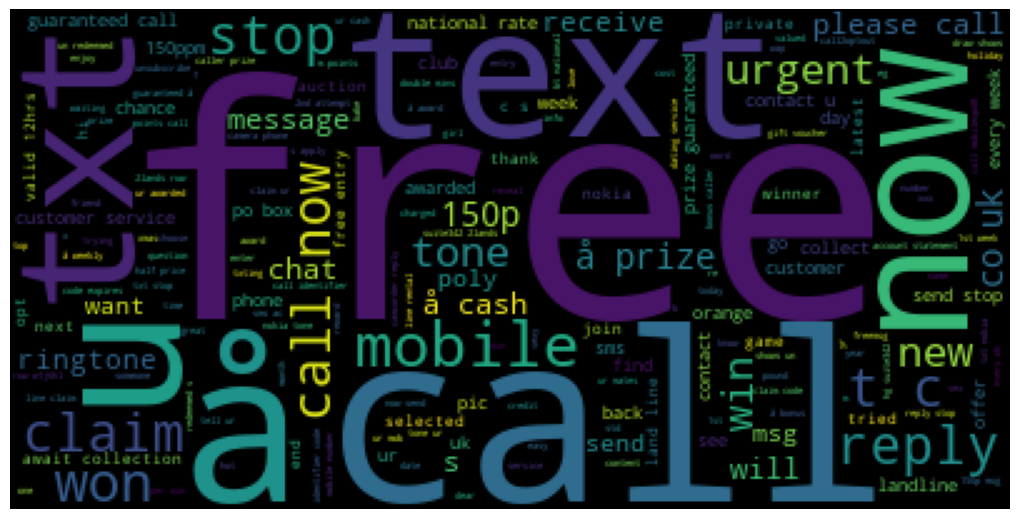

In [51]:
spam_wordcloud = WordCloud(width=400, height=200).generate(spam_words)

# Spam Word cloud

plt.figure( figsize=(10,8))
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

From the spam word cloud, we can see that **"free"** is most often used in **Spam**.

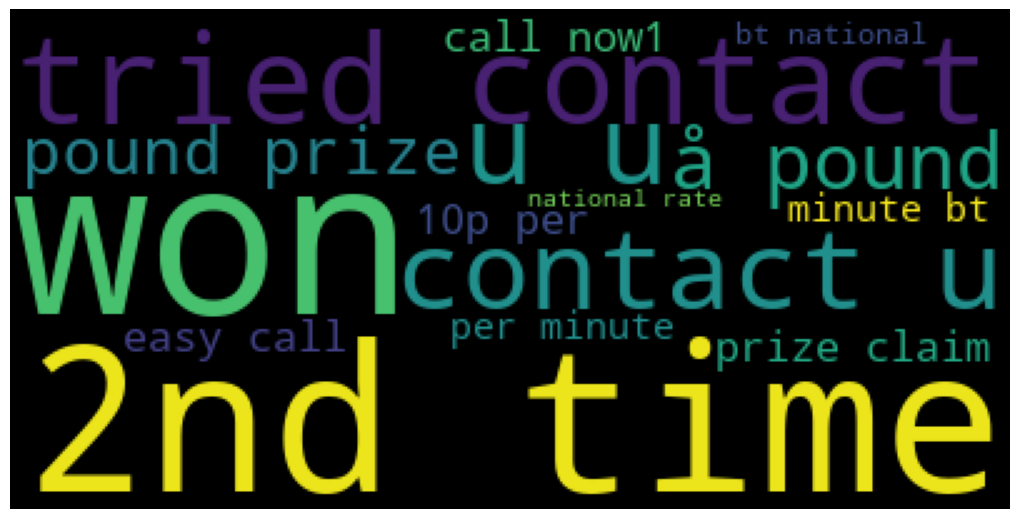

In [52]:
ham_wordcloud = WordCloud(width=400, height=200).generate(ham_words)

# Creating Ham wordcloud
plt.figure( figsize=(10,8))
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

From the spam word cloud, we can see that **"time"** & **"tried"** is most often used in **Ham**.

## Pipeline of NLP

In [53]:
from sklearn.pipeline import Pipeline

### Naive Bayes Classifier

In [54]:
from sklearn.naive_bayes import MultinomialNB

In [55]:
# each tuple takes the name you decide 
# next you call what you want to occur

text_mnb=Pipeline([('tfidf',TfidfVectorizer()),('mnb',MultinomialNB())])

In [56]:
# Directly pass the X_train dataset

text_mnb.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('mnb', MultinomialNB())])

In [57]:
X_test.head()

3245    squeeeeeze christmas hug u lik frndshp den hug...
944     also sorta blown couple time recently id rathe...
1044    mmm thats better got roast b better drink good...
2484                  mm kanji dont eat anything heavy ok
812     ring come guy costume gift future yowifes hint...
Name: Message, dtype: object

In [58]:
# It will take the X_test and do all the steps
# vectorize it and predict it

y_preds_mnb=text_mnb.predict(X_test)

In [59]:
# Predictions of the test data

y_preds_mnb

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype='<U4')

In [60]:
# Training score

text_mnb.score(X_train,y_train)

0.9761538461538461

In [61]:
# Testing score

text_mnb.score(X_test,y_test)

0.9712918660287081

### Confusion Matrix



In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
from sklearn.metrics import classification_report

In [64]:
print('Confusion Matrix: ')
print(confusion_matrix(y_test,y_preds_mnb))

print("\n")

print('Report: ')
print(classification_report(y_test,y_preds_mnb))

Confusion Matrix: 
[[1447    1]
 [  47  177]]


Report: 
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1448
        spam       0.99      0.79      0.88       224

    accuracy                           0.97      1672
   macro avg       0.98      0.89      0.93      1672
weighted avg       0.97      0.97      0.97      1672



1. Here we can see that **"ham"** label got predicted good but **"spam"** label prediction is not fine. so we can’t say that model is excellent. 

2. Model is lacking in predicting spam accurately.

### SVM Classifier

In [65]:
# Linear SVC (Support Vector Classifier)

from sklearn.svm import LinearSVC

In [66]:
# each tuple takes the name you decide 
# next you call what you want to occur

text_svm=Pipeline([('tfidf',TfidfVectorizer()),('svm',LinearSVC())])

In [67]:
# Directly pass the X_train dataset

text_svm.fit(X_train,y_train)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svm', LinearSVC())])

In [68]:
X_test.head()

3245    squeeeeeze christmas hug u lik frndshp den hug...
944     also sorta blown couple time recently id rathe...
1044    mmm thats better got roast b better drink good...
2484                  mm kanji dont eat anything heavy ok
812     ring come guy costume gift future yowifes hint...
Name: Message, dtype: object

In [69]:
# It will take the X_test and do all the steps
# vectorize it and predict it

y_preds_svm=text_svm.predict(X_test)

In [70]:
# Predictions of the test data

y_preds_svm

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

In [71]:
# Training score

text_svm.score(X_train,y_train)

1.0

In [72]:
# Testing score
text_svm.score(X_test,y_test)

0.9868421052631579

#### Confusion Matrix

In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
from sklearn.metrics import classification_report

In [75]:
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_preds_svm))

print("\n")

print('Report:')
print(classification_report(y_test,y_preds_svm))

Confusion Matrix:
[[1445    3]
 [  19  205]]


Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1448
        spam       0.99      0.92      0.95       224

    accuracy                           0.99      1672
   macro avg       0.99      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672



We can see that **"ham"** got predicted amazing, and also the **"spam"** label prediction increased as compared to the **"MultinomialNB"** model.

#### Difference

* Naive Bayes treats them as independent, whereas SVM looks at the interactions between them to a certain degree, as long as you're using a non-linear kernel (Gaussian, rbf, poly etc.)

* Using SVM would be a safe bet because it is not prone to catastrophic failures along with that the algorithm is able to correlate with other elements within the corpus that help to understand the dense features in NLP resulting in sentimental analysis or machine translation

* But in case of Naive Bayes, the results are not consistent enough. 

* Though it is more of a generalized algorithm that works effectively and cheaply when we want to classify a small corpus of data having a relatively small amount of input features, you don’t expect the inputs to be meaningfully correlated.

# <center> Prediciting on New SMS </center>

Working on custom text and see the model predictions

# Prediction for **Ham**

In [76]:
text = 'Today is a good day Devika and we will learn good things about NLP.'

In [77]:
def refined_text(text):
  
  # Removal of extra characters and stop words
  words = re.sub('[^a-zA-Z]',' ',text)
  words = words.lower()

  # Splits into list of words 
  words = words.split()

  # Lemmatizing the word and removing the stopwords
  words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]

  # Again join words to form sentences
  words = ' '.join(words)
  return words

In [78]:
refined_word = refined_text(text)

In [79]:
refined_word = [refined_word]

In [80]:
refined_word

['today good day devika learn good thing nlp']

In [81]:
# Directly predicting the single message to the model
text_mnb.predict(refined_word)

array(['ham'], dtype='<U4')

It predicted message as **"Spam"**.

# Prediction for **Spam**

In [82]:
text1 = 'Congratulations, you have won a lottery of ₹ 100000. To won Text on, 555500'

In [83]:
def refined_text(text1):
  
  # Removal of extra characters and stop words
  words = re.sub('[^a-zA-Z]',' ',text1)
  words = words.lower()

  # Splits into list of words 
  words = words.split()

  # Lemmatizing the word and removing the stopwords
  words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]

  # Again join words to form sentences
  words = ' '.join(words)
  return words

In [84]:
refined_word = refined_text(text1)

In [85]:
refined_word = [refined_word]

In [86]:
refined_word

['congratulation lottery text']

In [87]:
# Directly predicting the single message to the model

text_mnb.predict(refined_word)

array(['spam'], dtype='<U4')

It predicted message as **"Spam"**.